<a href="https://colab.research.google.com/github/c3Zor/jupyter_lab/blob/master/signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pwd

/content/sample_data


In [11]:
cd sample_data

[Errno 2] No such file or directory: 'sample_data'
/content/sample_data


In [12]:
!ls

anscombe.json		      german-traffic-signs   README.md
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


# New Section

In [13]:
#douwnloading data from bitbucket
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [14]:
!ls german-traffic-signs/

signnames.csv  test.p  train.p	valid.p


In [0]:
#importing libraries for signs
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D 
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
#for unpickle files in repository
import pickle
import pandas as pd
import random

In [0]:
#random seed to generate data allways the same
np.random.seed(0)

In [0]:
# with opens and closes the file in this case we open train.p, second argument is 
# what to do with the data opening in binary mode for reading ar writing 
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
# doing the same  for val data
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
# doing the same for test data
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

In [0]:
#cheking if data import was sucessful we will check if all the pic data 
# matches label data we will use assert funciot
assert(x_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(x_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels"
assert(x_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
# next we assert that our images are all the same size the check
#  if the tuble is 32x32x3 size
assert(x_train.shape[1:] == (32,32,3)), "The dimensions of the images ar not 32x32x3"
assert(x_val.shape[1:] == (32,32,3)), "The dimensions of the images ar not 32x32x3"
assert(x_test.shape[1:] == (32,32,3)), "The dimensions of the images ar not 32x32x3"

In [22]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
# out data is in dictiondary so we split it in two dictionaries
x_train, y_train = train_data['features'], train_data['labels']
x_val, y_val = val_data['features'], val_data['labels']
x_test, y_test = test_data['features'], test_data['labels']

In [24]:
# lest plot and analize the data
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

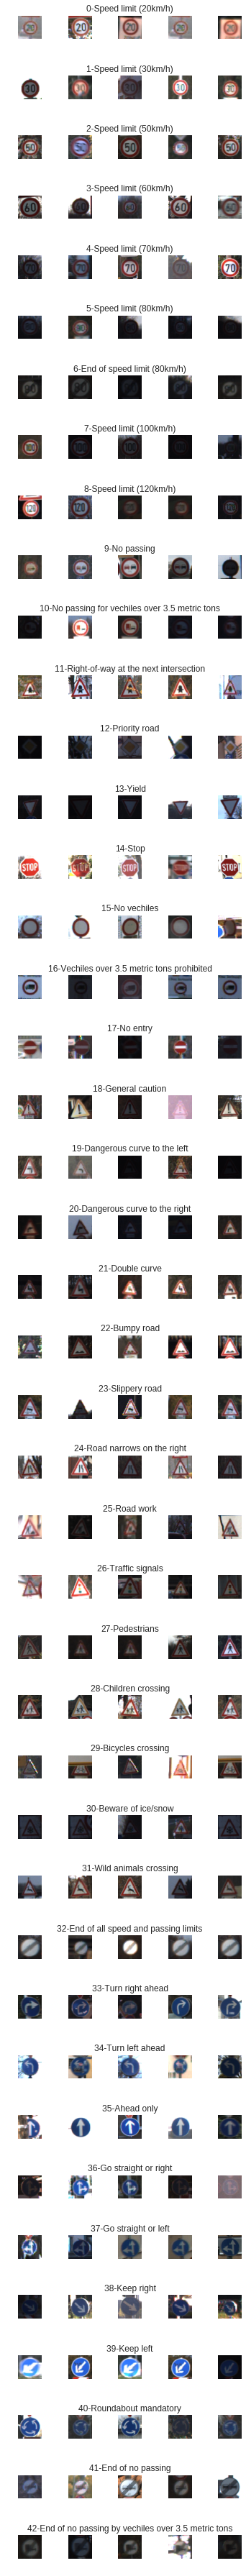

In [31]:
# builing a function to plot a couple of images in a training data of avery label
num_of_samples = []

cols = 5
num_classes = 43
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
  for j, row in data.iterrows():
    x_selected = x_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)),:,:], cmap=plt.get_cmap('gray'))
    axs[j][i].axis('off')
    if i == 2:
      axs[j][i].set_title(str(j) + '-' + row['SignName'])
      num_of_samples.append(len(x_selected))

In [0]:
# we will visualize how training data is distributed between classes
